<a href="https://colab.research.google.com/github/AbR04/6thSem-ML-Lab/blob/main/1BM22CS005_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

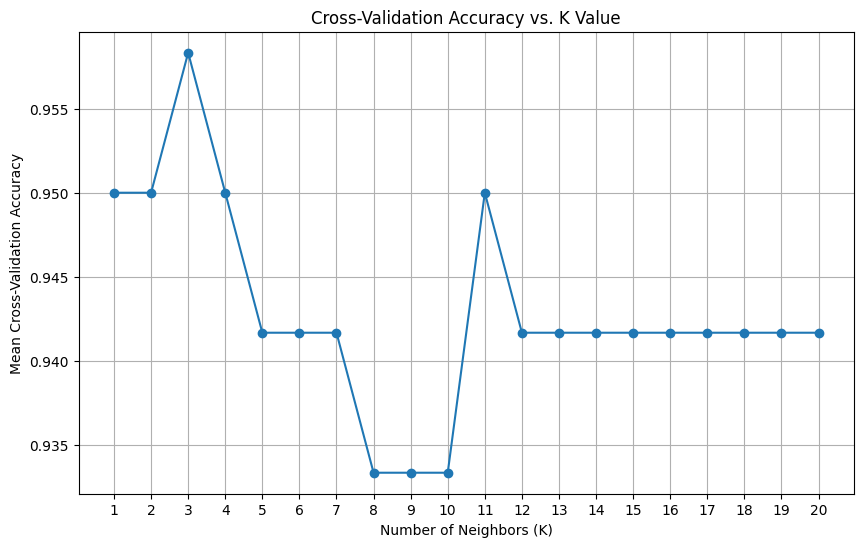


K-Nearest Neighbors Classifier with K = 5
Accuracy Score on Test Data: 1.0

Confusion Matrix on Test Data:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report on Test Data:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



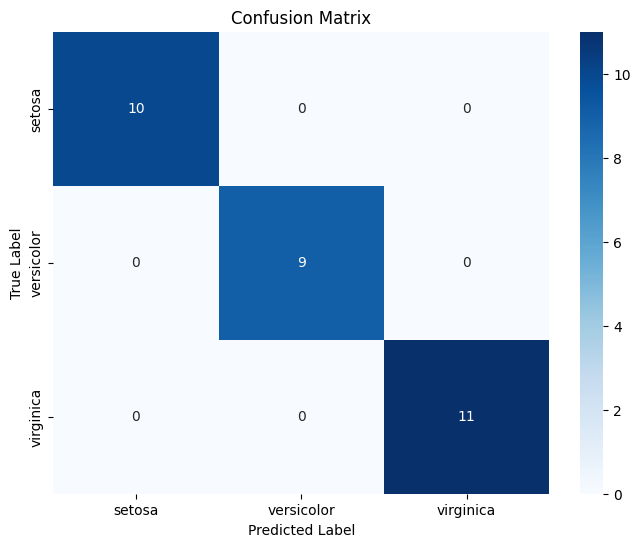

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Load the dataset
try:
    df = pd.read_csv("iris.csv")
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose an appropriate k value using cross-validation
k_values = list(range(1, 21))  # Try k values from 1 to 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to help choose k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Based on the plot, choose the best k value
# Let's assume the plot suggests k=5 is a good choice (this might vary)
best_k = 5

# Build and train the KNN classifier with the chosen k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"\nK-Nearest Neighbors Classifier with K = {best_k}")
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

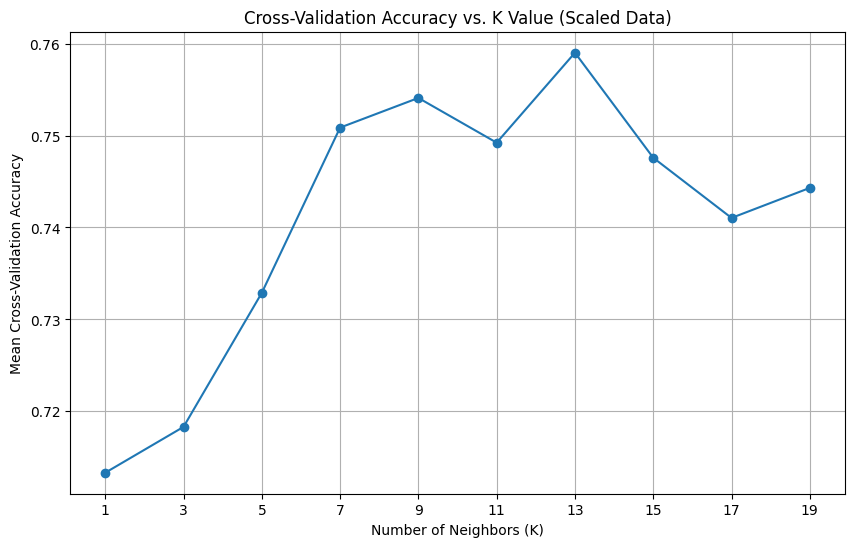


K-Nearest Neighbors Classifier with K = 7 (Scaled Data)
Accuracy Score on Test Data: 0.7467532467532467

Confusion Matrix on Test Data:
 [[84 16]
 [23 31]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



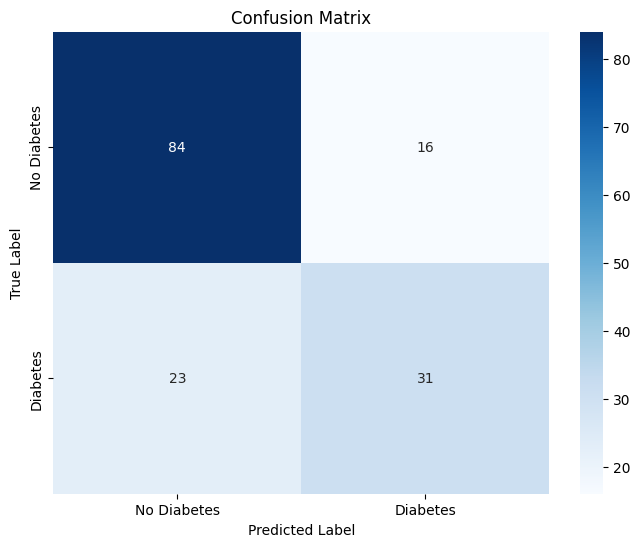

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Load the dataset
try:
    df = pd.read_csv("diabetes.csv")  # Assuming the file is named 'diabetes.csv'
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose an appropriate k value using cross-validation on the scaled training data
k_values = list(range(1, 21, 2))  # Try odd k values from 1 to 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to help choose k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value (Scaled Data)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Based on the plot, choose the best k value
# Let's assume the plot suggests k=7 is a good choice (this might vary)
best_k = 7

# Build and train the KNN classifier with the chosen k on the scaled training data
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"\nK-Nearest Neighbors Classifier with K = {best_k} (Scaled Data)")
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

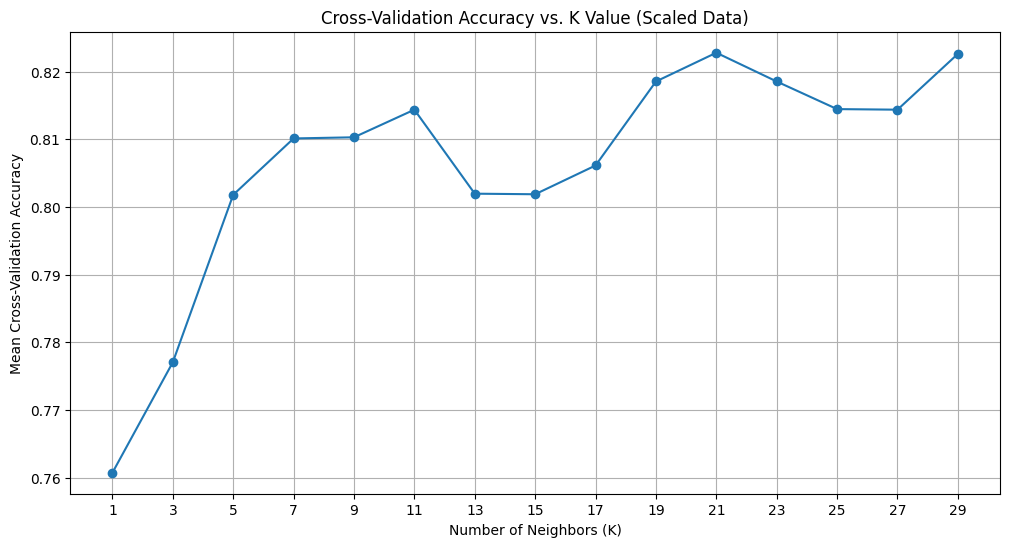


The optimal K value found through cross-validation is: 21

K-Nearest Neighbors Classifier with K = 21 (Scaled Data)
Accuracy Score on Test Data: 0.819672131147541


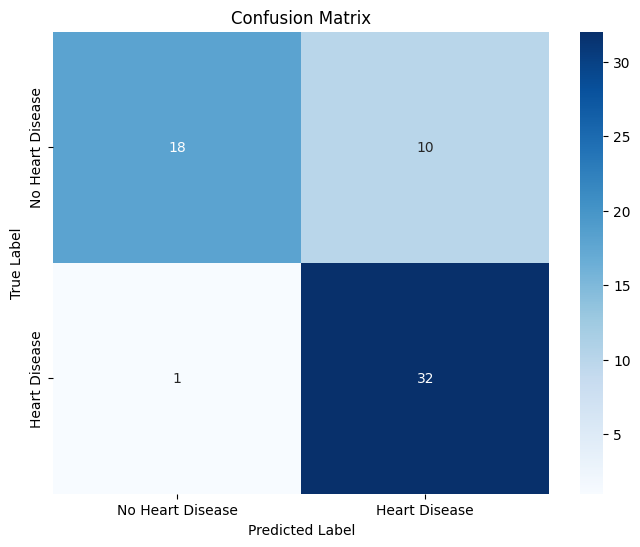


Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Load the dataset
try:
    df = pd.read_csv("heart.csv")  # Assuming the file is named 'heart.csv'
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the best k value using cross-validation on the scaled training data
k_values = list(range(1, 31, 2))  # Try odd k values from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to help choose k
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value (Scaled Data)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Identify the best k value from the cross-validation results
best_k_index = cv_scores.index(max(cv_scores))
best_k = k_values[best_k_index]
print(f"\nThe optimal K value found through cross-validation is: {best_k}")

# Build and train the KNN classifier with the best k on the scaled training data
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"\nK-Nearest Neighbors Classifier with K = {best_k} (Scaled Data)")
print("Accuracy Score on Test Data:", accuracy)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Classification Report
print("\nClassification Report on Test Data:\n", report)